# load_boston

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
data = load_boston()

In [6]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [7]:
print(data.keys())

dict_keys(['data', 'feature_names', 'DESCR', 'filename', 'target'])


In [8]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [13]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


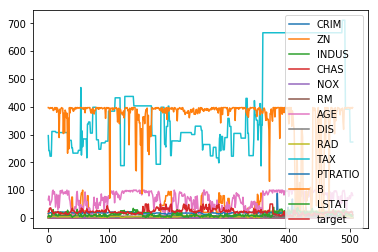

In [14]:
df.plot()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [16]:
class BostonModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(BostonModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [17]:
X = torch.Tensor(data.data)
y = torch.Tensor(data.target)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [19]:
model = BostonModel(13, 1) # 입력은 13, 출력은 하나의 숫자

In [21]:
n = 100
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([32.8882]) tensor(19.6000)


In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
print(model)

BostonModel(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [24]:
criterion = nn.MSELoss()

n_epochs = 100 # 100회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    for i in range(len(X_train)):
        y = model(X_train[i]).squeeze()
        target = y_train[i]
        loss = criterion(y, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.data
    avg_loss /= len(X_train)
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, avg_loss))

epoch 0th loss: 83.7457275390625
epoch 10th loss: 40.09757614135742
epoch 20th loss: 34.29750442504883
epoch 30th loss: 28.367013931274414
epoch 40th loss: 24.781810760498047
epoch 50th loss: 23.01877784729004
epoch 60th loss: 22.001672744750977
epoch 70th loss: 21.170825958251953
epoch 80th loss: 20.07573699951172
epoch 90th loss: 19.035781860351562


In [25]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([24.0579]) tensor(24.7000)


In [26]:
model = BostonModel(13, 1) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 467.12042236328125
epoch 1000th loss: 25.90216636657715
epoch 2000th loss: 20.7469539642334
epoch 3000th loss: 16.058156967163086
epoch 4000th loss: 9.921625137329102
epoch 5000th loss: 7.814052581787109
epoch 6000th loss: 7.041955471038818
epoch 7000th loss: 6.6164703369140625
epoch 8000th loss: 6.378288745880127
epoch 9000th loss: 6.488948345184326


In [27]:
n = 99
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([37.2647]) tensor(42.3000)


In [28]:
model = BostonModel(13, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred = model(X_test).squeeze()
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 1589.147216796875 test loss: 1329.8060302734375
epoch 1000th training loss: 33.111793518066406 test loss: 38.29947280883789
epoch 2000th training loss: 26.308374404907227 test loss: 33.24735641479492
epoch 3000th training loss: 22.766420364379883 test loss: 29.828290939331055
epoch 4000th training loss: 19.492666244506836 test loss: 26.160083770751953
epoch 5000th training loss: 15.813753128051758 test loss: 22.72980308532715
epoch 6000th training loss: 12.504011154174805 test loss: 19.89760971069336
epoch 7000th training loss: 10.282837867736816 test loss: 16.703222274780273
epoch 8000th training loss: 9.103750228881836 test loss: 14.886774063110352
epoch 9000th training loss: 8.300642013549805 test loss: 14.566851615905762


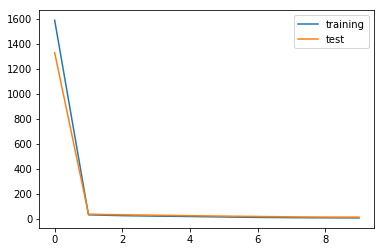

In [29]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)

0.8097376618475878
